In [1]:
# -- PART 0: Import Statements
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# -- PART 1: Load the Data
df = pd.read_csv('Data_Entry_2017_v2020.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
# -- PART 2: Dataset Exploration

# ---- (a) create a new dataset with dummy variables for each diagnosis
df_diagnoses = df['Finding Labels'].str.get_dummies(sep='|')
pd.concat([df['Finding Labels'], df_diagnoses], axis = 1)

,Finding Labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cardiomegaly|Emphysema,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Cardiomegaly|Effusion,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Hernia,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,Mass|Pneumonia,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# ---- (b) look at number of data points per label 
df_cat_count = pd.DataFrame(df_diagnoses.sum().sort_values(ascending=False))
df_cat_count

,0
No Finding,60361
Infiltration,19894
Effusion,13317
Atelectasis,11559
Nodule,6331
Mass,5782
Pneumothorax,5302
Consolidation,4667
Pleural_Thickening,3385
Cardiomegaly,2776


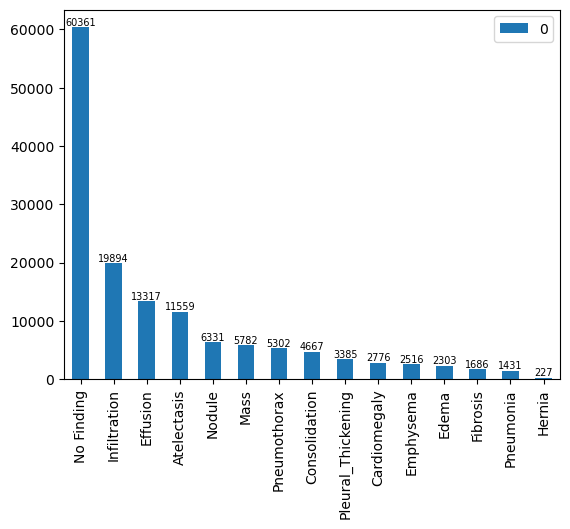

In [23]:
# visualize in a graph 
freq_plot = df_cat_count.plot(kind='bar')

for i, count in enumerate(df_cat_count.iloc[:,0]): 
    freq_plot.text(i, count + 0.2, f'{count}', ha='center', va='bottom', 
                   fontdict = {'fontsize': 7})